In [18]:
import math
import numpy as np 
import matplotlib.pyplot as plt


In [19]:
def f(x):
    return (x*x*x)-(0.165*x*x)+3.993e-4

In [20]:
def f_prime(x):
    return (3*x*x)-(0.33*x)


In [21]:
X=np.linspace(-1,1,500)
y=[f(i) for i in X]


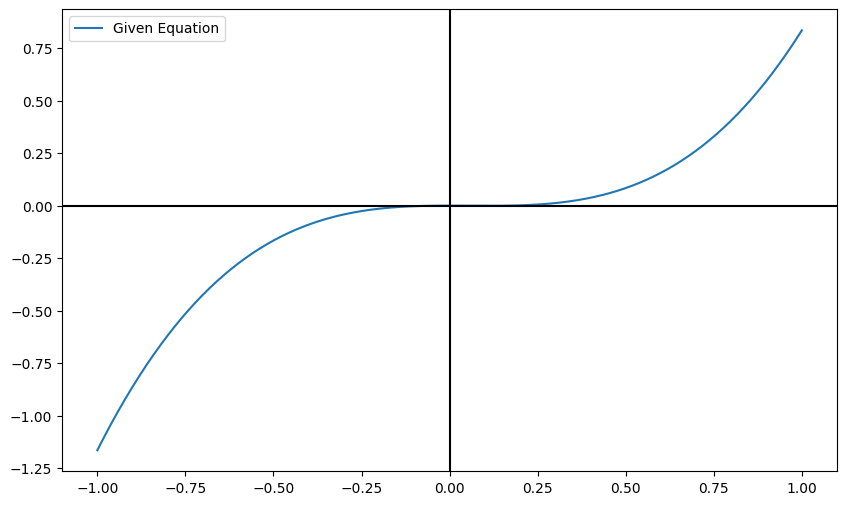

In [22]:
plt.figure(figsize=(10,6))
plt.plot(X,y,label='Given Equation')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.legend()
plt.show()

In [23]:
def newton_rapson_method(xi,threshold=0.05,max_iteration=100,verbose=True):
    if(f_prime(xi)==0):
        raise ValueError("Error: f' can't be zero")
    iteration = 0
    results = []
    xr_old = xi
    converged = False
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xi':<15} {'x_i+1':<15}  {'f(xr)':<15} {'εa (%)':<12}")
        print("="*80)
    while iteration<max_iteration:
        iteration+=1
        xr=xi-(f(xi)/f_prime(xi))
        ea=abs((xr-xr_old)/xr)*100
        results.append({
            'Iteration': iteration,
            'x_i': xi,
            'x_i+1': xr, 
            'f(x_i+1)': f(xr),
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        if verbose:
            ea_str = f"{ea:.8f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {xi:<15.10f} {xr:<15.10f} {f(xr):<15.10f} {ea_str:<12}")
        
        
        if iteration > 1 and ea < threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {threshold}%")
            break
        xi=xr
        xr_old=xr
    if not converged and verbose:
        print(f"Maximum iterations ({max_iteration}) reached without convergence")
    
    return results, xr
    
        

In [24]:
0.05-f(0.05)/f_prime(0.05)

0.062422222222222226

In [25]:
xi=0.05
stopping=0.005
results, final_root = newton_rapson_method(xi,stopping)

print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")


Iter  xi              x_i+1            f(xr)           εa (%)      
1     0.0500000000    0.0624222222    -0.0000003978   19.90032040 
2     0.0624222222    0.0623775765    0.0000000000    0.07157328  
3     0.0623775765    0.0623775815    0.0000000000    0.00000797  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0000079681% < 0.005%

FINAL RESULT:
Root: x = 0.0623775815
f(x) = 0.0000000000
Total iterations: 3
